In [1]:
from experiment import Experiment
import torch
torch.manual_seed(2)
%matplotlib inline

In [2]:
var_dict = dict(
    numerical_vars = ['Alcohol','Malic_acid','Ash','Alcalinity_of_ash',
                      'Magnesium','Total_phenols','Flavanoids','Nonflavanoid_phenols',
                      'Proanthocyanins','Color_intensity','Hue','OD280/OD315_of_diluted_wines',
                      'Proline'],
    class_var = 'class'
)

In [3]:
exp = Experiment('data/wine.csv', 
                 var_dict,
                 embedding_dim=8,
                 lr=5e-3,
                 batch_size=1024,
                 n_epoch=50,
                 verbose=True,
                 n_bins_range=range(2, 21),
                 n_init_bins_list=[10,15,20])

In [45]:
from data_handler import DataHandler
handler = DataHandler(exp.data, exp.var_dict)
from semantic_binning import SemanticBinning
sb = SemanticBinning(handler.var_dict, embedding_dim=6, batch_size=1024, 
                     n_epoch=30, lr=5e-3, weight_decay=0.0, verbose=True)
sb.fit(exp.data, n_init_bins=15)

>>> Epoch = 1, Loss = 0.44397640228271484
[12, 4, 12, 13, 10, 13, 13, 9, 13, 7, 9, 10, 9]
>>> Epoch = 2, Loss = 0.31219977140426636
[12, 4, 12, 13, 10, 13, 7, 12, 13, 7, 7, 5, 9]
>>> Epoch = 3, Loss = 0.25874027609825134
[9, 4, 11, 10, 10, 14, 7, 11, 13, 8, 7, 9, 9]
>>> Epoch = 4, Loss = 0.2374631017446518
[12, 4, 10, 10, 12, 14, 5, 9, 12, 8, 7, 11, 9]
>>> Epoch = 5, Loss = 0.23562853038311005
[12, 4, 14, 10, 12, 14, 11, 5, 12, 8, 7, 9, 9]
>>> Epoch = 6, Loss = 0.22990202903747559
[12, 4, 14, 10, 12, 14, 14, 5, 10, 10, 9, 11, 9]
0 5
>>> Epoch = 7, Loss = 0.23202742636203766
[12, 5, 10, 10, 12, 14, 14, 5, 10, 10, 9, 11, 9]
0 5
>>> Epoch = 8, Loss = 0.23120597004890442
[12, 5, 10, 10, 12, 14, 14, 5, 10, 8, 9, 11, 9]
0 5
>>> Epoch = 9, Loss = 0.23036138713359833
[12, 5, 10, 10, 10, 13, 14, 5, 12, 8, 7, 11, 9]
0 5
>>> Epoch = 10, Loss = 0.22793947160243988
[12, 4, 10, 10, 10, 14, 13, 5, 12, 8, 7, 11, 9]
0 5
>>> Epoch = 11, Loss = 0.2266443371772766
[12, 4, 10, 10, 14, 14, 13, 5, 13, 8, 7, 

In [18]:
%time clustering_scores = exp.test_clustering_performance()

>>> Epoch = 1, Loss = 0.3307836353778839
[8, 7, 6, 4, 8, 7, 9, 7, 8, 7, 5, 8, 7]
>>> Epoch = 2, Loss = 0.30988526344299316
[8, 7, 7, 9, 8, 7, 5, 7, 8, 7, 5, 10, 7]
>>> Epoch = 3, Loss = 0.30668574571609497
[8, 7, 7, 7, 6, 8, 4, 7, 6, 7, 5, 9, 8]
>>> Epoch = 4, Loss = 0.29919615387916565
[8, 8, 7, 6, 8, 7, 4, 6, 6, 7, 5, 5, 9]
>>> Epoch = 5, Loss = 0.2970266342163086
[8, 9, 7, 8, 7, 7, 2, 6, 6, 7, 5, 5, 9]
>>> Epoch = 6, Loss = 0.29508206248283386
[2, 8, 4, 8, 6, 2, 2, 6, 6, 7, 5, 5, 4]
0 5
>>> Epoch = 7, Loss = 0.3128010928630829
[2, 2, 5, 8, 6, 6, 2, 10, 6, 7, 5, 5, 4]
0 5
>>> Epoch = 8, Loss = 0.29302701354026794
[2, 2, 4, 8, 6, 6, 2, 10, 6, 8, 5, 5, 2]
0 5
>>> Epoch = 9, Loss = 0.3023627996444702
[2, 2, 5, 8, 6, 6, 2, 10, 6, 8, 5, 5, 2]
0 5
>>> Epoch = 10, Loss = 0.2987940013408661
[2, 2, 5, 8, 6, 6, 3, 10, 6, 8, 5, 5, 2]
0 5
>>> Epoch = 11, Loss = 0.29304802417755127
[2, 4, 5, 8, 6, 6, 3, 9, 6, 9, 6, 2, 2]
0 5
>>> Epoch = 12, Loss = 0.2901442348957062
[2, 2, 4, 8, 6, 6, 3, 9, 6, 9,

CPU times: user 7min 2s, sys: 38.5 s, total: 7min 40s
Wall time: 6min 58s


In [19]:
exp.print_clustering_scores(clustering_scores, method='dummy_only')

kmeans, #Cols = 13, NMI = 0.4288
agglomerative, #Cols = 13, NMI = 0.4161


In [20]:
exp.print_clustering_scores(clustering_scores, method='scale_numeric')

kmeans, #Cols = 13, NMI = 0.8759
agglomerative, #Cols = 13, NMI = 0.7865


In [21]:
exp.print_clustering_scores(clustering_scores, method='equal_width')

kmeans
#Bins = 2, #Cols = 26, #NMI = 0.5555
#Bins = 3, #Cols = 39, #NMI = 0.6464
#Bins = 4, #Cols = 52, #NMI = 0.7319
#Bins = 5, #Cols = 65, #NMI = 0.7915
#Bins = 6, #Cols = 78, #NMI = 0.7812
#Bins = 7, #Cols = 91, #NMI = 0.8205
#Bins = 8, #Cols = 104, #NMI = 0.7872
#Bins = 9, #Cols = 117, #NMI = 0.8507
#Bins = 10, #Cols = 130, #NMI = 0.7573
#Bins = 11, #Cols = 143, #NMI = 0.7774
#Bins = 12, #Cols = 156, #NMI = 0.7641
#Bins = 13, #Cols = 169, #NMI = 0.7589
#Bins = 14, #Cols = 182, #NMI = 0.7782
#Bins = 15, #Cols = 195, #NMI = 0.8507
#Bins = 16, #Cols = 208, #NMI = 0.7519
#Bins = 17, #Cols = 221, #NMI = 0.8561
#Bins = 18, #Cols = 234, #NMI = 0.7717
#Bins = 19, #Cols = 247, #NMI = 0.8187
#Bins = 20, #Cols = 260, #NMI = 0.7358
agglomerative
#Bins = 2, #Cols = 26, #NMI = 0.5865
#Bins = 3, #Cols = 39, #NMI = 0.7459
#Bins = 4, #Cols = 52, #NMI = 0.7172
#Bins = 5, #Cols = 65, #NMI = 0.8259
#Bins = 6, #Cols = 78, #NMI = 0.7373
#Bins = 7, #Cols = 91, #NMI = 0.8222
#Bins = 8, #Cols = 104, #NMI =

In [22]:
exp.print_clustering_scores(clustering_scores, method='equal_freq')

kmeans
#Bins = 2, #Cols = 26, #NMI = 0.7021
#Bins = 3, #Cols = 39, #NMI = 0.7944
#Bins = 4, #Cols = 52, #NMI = 0.9011
#Bins = 5, #Cols = 65, #NMI = 0.8316
#Bins = 6, #Cols = 78, #NMI = 0.8610
#Bins = 7, #Cols = 91, #NMI = 0.8473
#Bins = 8, #Cols = 104, #NMI = 0.8330
#Bins = 9, #Cols = 117, #NMI = 0.8363
#Bins = 10, #Cols = 130, #NMI = 0.8615
#Bins = 11, #Cols = 143, #NMI = 0.7838
#Bins = 12, #Cols = 156, #NMI = 0.8507
#Bins = 13, #Cols = 169, #NMI = 0.7093
#Bins = 14, #Cols = 182, #NMI = 0.7966
#Bins = 15, #Cols = 195, #NMI = 0.7576
#Bins = 16, #Cols = 208, #NMI = 0.8139
#Bins = 17, #Cols = 221, #NMI = 0.7515
#Bins = 18, #Cols = 232, #NMI = 0.7745
#Bins = 19, #Cols = 247, #NMI = 0.5782
#Bins = 20, #Cols = 256, #NMI = 0.7136
agglomerative
#Bins = 2, #Cols = 26, #NMI = 0.6716
#Bins = 3, #Cols = 39, #NMI = 0.7282
#Bins = 4, #Cols = 52, #NMI = 0.6903
#Bins = 5, #Cols = 65, #NMI = 0.7362
#Bins = 6, #Cols = 78, #NMI = 0.7067
#Bins = 7, #Cols = 91, #NMI = 0.8630
#Bins = 8, #Cols = 104, #NMI =

In [23]:
exp.print_clustering_scores(clustering_scores, method='semantic_binning')

kmeans
#Init Bins = 10, #Cols = 42, NMI = 0.8507
#Init Bins = 15, #Cols = 71, NMI = 0.8782
#Init Bins = 20, #Cols = 90, NMI = 0.8353
agglomerative
#Init Bins = 10, #Cols = 42, NMI = 0.9088
#Init Bins = 15, #Cols = 71, NMI = 0.8086
#Init Bins = 20, #Cols = 90, NMI = 0.8303


In [24]:
%time clf_scores = exp.test_classification_performance(cv=3)

>>> Epoch = 1, Loss = 0.36501678824424744
[5, 7, 6, 10, 4, 8, 8, 7, 9, 3, 7, 6, 7]
0 5
>>> Epoch = 2, Loss = 0.3119983375072479
[5, 7, 6, 9, 4, 7, 9, 7, 9, 8, 7, 6, 7]
0 5
>>> Epoch = 3, Loss = 0.30703768134117126
[2, 7, 6, 4, 4, 7, 7, 7, 9, 8, 7, 6, 7]
0 5
>>> Epoch = 4, Loss = 0.29659581184387207
[2, 7, 6, 4, 6, 7, 5, 5, 9, 5, 8, 6, 7]
0 5
>>> Epoch = 5, Loss = 0.3105528652667999
[2, 7, 6, 4, 6, 6, 4, 4, 6, 5, 7, 6, 7]
0 5
>>> Epoch = 6, Loss = 0.28007617592811584
[2, 7, 6, 4, 5, 2, 4, 4, 4, 5, 9, 5, 7]
0 5
>>> Epoch = 7, Loss = 0.29336437582969666
[2, 7, 6, 4, 5, 2, 4, 4, 4, 5, 8, 5, 5]
0 5
>>> Epoch = 8, Loss = 0.29345691204071045
[2, 5, 8, 4, 5, 2, 4, 4, 4, 4, 8, 4, 5]
0 5
>>> Epoch = 9, Loss = 0.29330962896347046
[2, 5, 7, 4, 5, 2, 4, 4, 4, 4, 9, 4, 6]
0 5
>>> Epoch = 10, Loss = 0.3093333840370178
[2, 5, 8, 2, 5, 2, 4, 4, 4, 4, 7, 4, 6]
0 5
>>> Epoch = 11, Loss = 0.2874133884906769
[2, 5, 8, 2, 5, 2, 4, 4, 4, 4, 7, 4, 6]
1 5
>>> Epoch = 12, Loss = 0.3070407509803772
[2, 5, 8, 2, 

>>> Epoch = 1, Loss = 0.3495835065841675
[4, 8, 9, 6, 5, 8, 9, 6, 3, 5, 5, 9, 9]
0 5
>>> Epoch = 2, Loss = 0.30355560779571533
[4, 8, 9, 10, 5, 8, 9, 6, 5, 5, 8, 9, 9]
0 5
>>> Epoch = 3, Loss = 0.30556803941726685
[4, 8, 9, 5, 5, 8, 7, 5, 3, 5, 9, 8, 9]
0 5
>>> Epoch = 4, Loss = 0.2994768023490906
[4, 8, 9, 7, 5, 8, 4, 8, 3, 5, 9, 8, 5]
0 5
>>> Epoch = 5, Loss = 0.2933366894721985
[4, 8, 9, 3, 5, 6, 3, 7, 4, 5, 7, 7, 5]
0 5
>>> Epoch = 6, Loss = 0.2953004837036133
[4, 8, 9, 5, 5, 2, 3, 6, 4, 5, 4, 5, 2]
0 5
>>> Epoch = 7, Loss = 0.2996322214603424
[4, 8, 9, 3, 5, 2, 2, 3, 4, 5, 4, 5, 2]
0 5
>>> Epoch = 8, Loss = 0.29029059410095215
[4, 8, 9, 5, 5, 2, 2, 2, 2, 5, 9, 5, 2]
0 5
>>> Epoch = 9, Loss = 0.2815719544887543
[4, 8, 9, 5, 5, 2, 2, 2, 2, 7, 4, 5, 2]
0 5
>>> Epoch = 10, Loss = 0.29799532890319824
[7, 8, 9, 5, 5, 2, 2, 2, 2, 2, 9, 5, 2]
0 5
>>> Epoch = 11, Loss = 0.28358131647109985
[2, 3, 9, 5, 5, 2, 2, 2, 2, 2, 9, 6, 2]
0 5
>>> Epoch = 12, Loss = 0.29077062010765076
[2, 3, 9, 5, 5

[8, 11, 14, 16, 10, 4, 5, 10, 2, 6, 6, 2, 9]
0 5
1 5
Embedding Failed to Converge in given #epochs..
>>> Epoch = 1, Loss = 0.34203076362609863
[10, 6, 6, 6, 5, 10, 4, 6, 3, 10, 8, 9, 8]
0 5
>>> Epoch = 2, Loss = 0.3110310733318329
[9, 4, 6, 6, 4, 5, 6, 4, 3, 10, 6, 9, 8]
0 5
>>> Epoch = 3, Loss = 0.3044562339782715
[9, 7, 6, 5, 6, 5, 8, 8, 5, 10, 6, 9, 5]
0 5
>>> Epoch = 4, Loss = 0.30813804268836975
[9, 7, 6, 5, 4, 4, 7, 4, 6, 10, 6, 9, 6]
0 5
>>> Epoch = 5, Loss = 0.3023453652858734
[8, 7, 5, 5, 4, 4, 2, 2, 6, 10, 6, 9, 5]
0 5
>>> Epoch = 6, Loss = 0.30090469121932983
[10, 5, 6, 5, 4, 4, 2, 2, 6, 10, 6, 9, 2]
0 5
>>> Epoch = 7, Loss = 0.29954931139945984
[8, 5, 7, 5, 4, 5, 3, 2, 6, 9, 6, 9, 2]
0 5
>>> Epoch = 8, Loss = 0.2960010766983032
[8, 5, 4, 2, 4, 2, 3, 2, 6, 9, 6, 2, 2]
0 5
>>> Epoch = 9, Loss = 0.2850112020969391
[8, 5, 4, 2, 4, 3, 3, 2, 5, 10, 2, 2, 2]
0 5
>>> Epoch = 10, Loss = 0.27955901622772217
[2, 5, 4, 2, 4, 3, 3, 6, 5, 9, 2, 2, 2]
0 5
>>> Epoch = 11, Loss = 0.28886020

[4, 15, 18, 18, 15, 2, 3, 4, 6, 4, 10, 10, 2]
0 5
>>> Epoch = 30, Loss = 0.15697552263736725
[4, 15, 8, 18, 10, 4, 3, 4, 6, 4, 10, 10, 2]
0 5
1 5
Embedding Failed to Converge in given #epochs..
CPU times: user 20min 29s, sys: 1.73 s, total: 20min 30s
Wall time: 20min 30s


In [25]:
exp.print_classification_scores(clf_scores, method='dummy_only')

DT performance
#cols = 13.0, Accuracy = 0.888 (+/- 0.033)
LR performance
#cols = 13.0, Accuracy = 0.949 (+/- 0.083)


In [26]:
exp.print_classification_scores(clf_scores, method='scale_numeric')

DT performance
#cols = 13.0, Accuracy = 0.888 (+/- 0.033)
LR performance
#cols = 13.0, Accuracy = 0.989 (+/- 0.016)


In [27]:
exp.print_classification_scores(clf_scores, method='equal_width')

DT performance
#Bins = 2, #Avg Cols = 26.0, Accuracy = 0.848 (+/- 0.025)
#Bins = 3, #Avg Cols = 39.0, Accuracy = 0.888 (+/- 0.041)
#Bins = 4, #Avg Cols = 52.0, Accuracy = 0.910 (+/- 0.068)
#Bins = 5, #Avg Cols = 65.0, Accuracy = 0.910 (+/- 0.043)
#Bins = 6, #Avg Cols = 78.0, Accuracy = 0.876 (+/- 0.057)
#Bins = 7, #Avg Cols = 91.0, Accuracy = 0.848 (+/- 0.097)
#Bins = 8, #Avg Cols = 104.0, Accuracy = 0.854 (+/- 0.082)
#Bins = 9, #Avg Cols = 117.0, Accuracy = 0.876 (+/- 0.017)
#Bins = 10, #Avg Cols = 130.0, Accuracy = 0.854 (+/- 0.081)
#Bins = 11, #Avg Cols = 143.0, Accuracy = 0.894 (+/- 0.086)
#Bins = 12, #Avg Cols = 156.0, Accuracy = 0.848 (+/- 0.053)
#Bins = 13, #Avg Cols = 169.0, Accuracy = 0.815 (+/- 0.123)
#Bins = 14, #Avg Cols = 182.0, Accuracy = 0.843 (+/- 0.031)
#Bins = 15, #Avg Cols = 195.0, Accuracy = 0.848 (+/- 0.074)
#Bins = 16, #Avg Cols = 208.0, Accuracy = 0.893 (+/- 0.040)
#Bins = 17, #Avg Cols = 221.0, Accuracy = 0.792 (+/- 0.060)
#Bins = 18, #Avg Cols = 234.0, Accuracy

In [28]:
exp.print_classification_scores(clf_scores, method='equal_freq')

DT performance
#Bins = 2, #Avg Cols = 26.0, Accuracy = 0.888 (+/- 0.041)
#Bins = 3, #Avg Cols = 39.0, Accuracy = 0.910 (+/- 0.056)
#Bins = 4, #Avg Cols = 52.0, Accuracy = 0.831 (+/- 0.147)
#Bins = 5, #Avg Cols = 65.0, Accuracy = 0.888 (+/- 0.082)
#Bins = 6, #Avg Cols = 78.0, Accuracy = 0.854 (+/- 0.077)
#Bins = 7, #Avg Cols = 91.0, Accuracy = 0.910 (+/- 0.014)
#Bins = 8, #Avg Cols = 104.0, Accuracy = 0.854 (+/- 0.044)
#Bins = 9, #Avg Cols = 117.0, Accuracy = 0.815 (+/- 0.083)
#Bins = 10, #Avg Cols = 130.0, Accuracy = 0.843 (+/- 0.170)
#Bins = 11, #Avg Cols = 143.0, Accuracy = 0.882 (+/- 0.084)
#Bins = 12, #Avg Cols = 156.0, Accuracy = 0.803 (+/- 0.158)
#Bins = 13, #Avg Cols = 169.0, Accuracy = 0.843 (+/- 0.112)
#Bins = 14, #Avg Cols = 181.66666666666666, Accuracy = 0.815 (+/- 0.072)
#Bins = 15, #Avg Cols = 195.0, Accuracy = 0.792 (+/- 0.126)
#Bins = 16, #Avg Cols = 207.66666666666666, Accuracy = 0.787 (+/- 0.094)
#Bins = 17, #Avg Cols = 220.0, Accuracy = 0.877 (+/- 0.103)
#Bins = 18, #

In [29]:
exp.print_classification_scores(clf_scores, method='semantic_binning')

DT performance
#Init Bins = 10, #Avg Cols = 52.333333333333336, Accuracy = 0.860 (+/- 0.040)
#Init Bins = 15, #Avg Cols = 76.0, Accuracy = 0.865 (+/- 0.112)
#Init Bins = 20, #Avg Cols = 107.33333333333333, Accuracy = 0.843 (+/- 0.070)
LR performance
#Init Bins = 10, #Avg Cols = 52.333333333333336, Accuracy = 0.944 (+/- 0.016)
#Init Bins = 15, #Avg Cols = 76.0, Accuracy = 0.938 (+/- 0.058)
#Init Bins = 20, #Avg Cols = 107.33333333333333, Accuracy = 0.949 (+/- 0.001)
NB performance
#Init Bins = 10, #Avg Cols = 52.333333333333336, Accuracy = 0.955 (+/- 0.043)
#Init Bins = 15, #Avg Cols = 76.0, Accuracy = 0.927 (+/- 0.064)
#Init Bins = 20, #Avg Cols = 107.33333333333333, Accuracy = 0.944 (+/- 0.031)


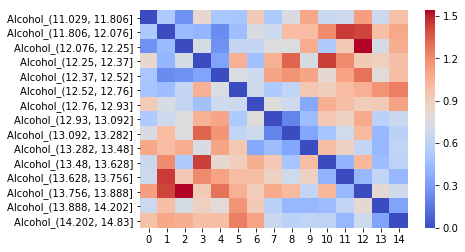

In [31]:
sb.plot_pairwise_distance_between_bins('Alcohol')

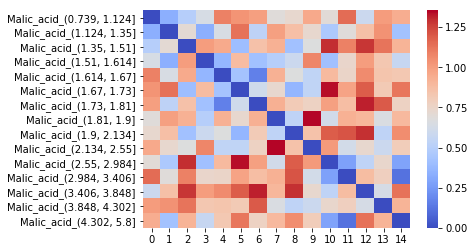

In [32]:
sb.plot_pairwise_distance_between_bins('Malic_acid')

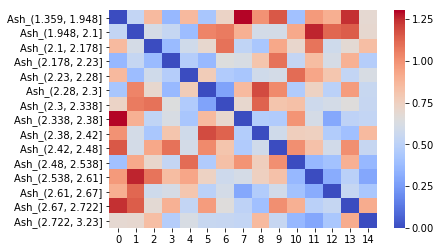

In [33]:
sb.plot_pairwise_distance_between_bins('Ash')

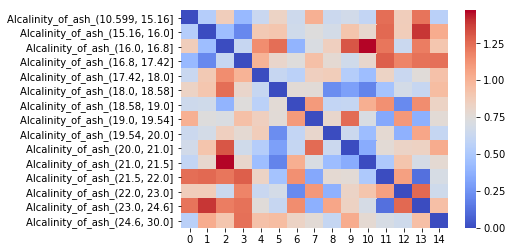

In [34]:
sb.plot_pairwise_distance_between_bins('Alcalinity_of_ash')

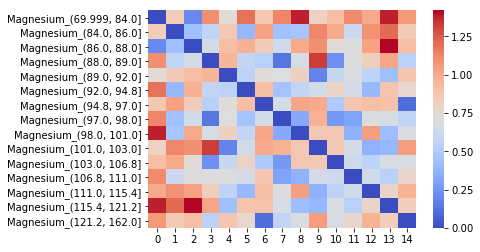

In [35]:
sb.plot_pairwise_distance_between_bins('Magnesium')

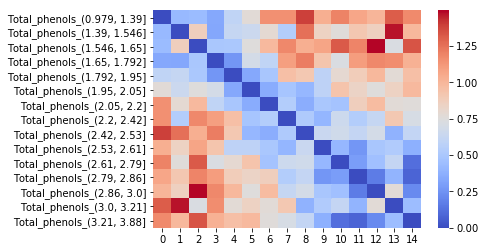

In [36]:
sb.plot_pairwise_distance_between_bins('Total_phenols')

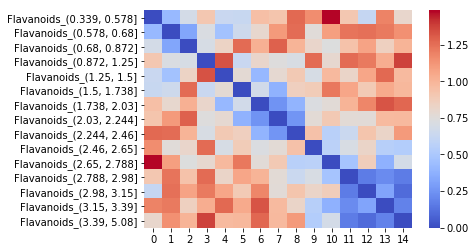

In [37]:
sb.plot_pairwise_distance_between_bins('Flavanoids')

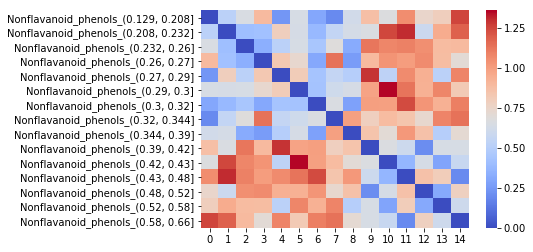

In [38]:
sb.plot_pairwise_distance_between_bins('Nonflavanoid_phenols')

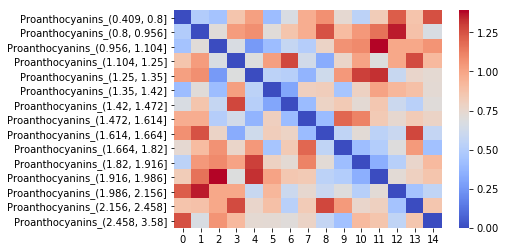

In [39]:
sb.plot_pairwise_distance_between_bins('Proanthocyanins')

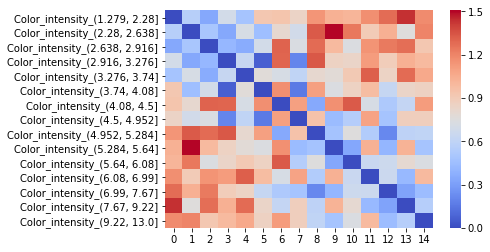

In [40]:
sb.plot_pairwise_distance_between_bins('Color_intensity')

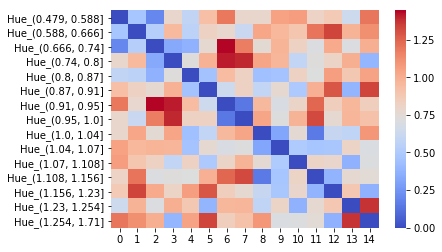

In [41]:
sb.plot_pairwise_distance_between_bins('Hue')

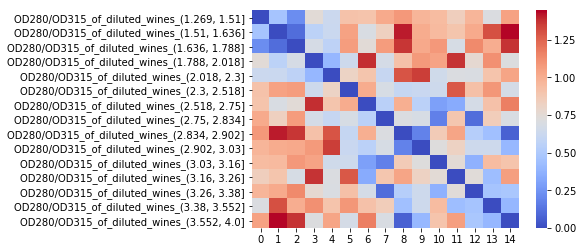

In [42]:
sb.plot_pairwise_distance_between_bins('OD280/OD315_of_diluted_wines')

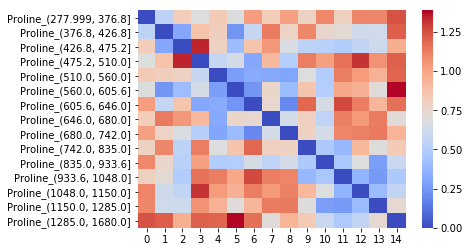

In [43]:
sb.plot_pairwise_distance_between_bins('Proline')

In [44]:
for var, bins in sb.bins_by_var.items():
    print(var)
    print(bins['bins'])

Alcohol
['(11.029, 12.93]', '(12.93, 14.83]']
Malic_acid
['(0.739, 1.35]', '(1.35, 1.51]', '(1.51, 1.614]', '(1.614, 1.67]', '(1.67, 1.73]', '(1.73, 1.81]', '(1.81, 1.9]', '(1.9, 2.134]', '(2.134, 2.55]', '(2.55, 3.406]', '(3.406, 4.302]', '(4.302, 5.8]']
Ash
['(1.359, 1.948]', '(1.948, 2.178]', '(2.178, 2.23]', '(2.23, 2.28]', '(2.28, 2.338]', '(2.338, 2.48]', '(2.48, 2.67]', '(2.67, 2.722]', '(2.722, 3.23]']
Alcalinity_of_ash
['(10.599, 16.0]', '(16.0, 16.8]', '(16.8, 17.42]', '(17.42, 18.58]', '(18.58, 19.0]', '(19.0, 19.54]', '(19.54, 21.5]', '(21.5, 22.0]', '(22.0, 23.0]', '(23.0, 24.6]', '(24.6, 30.0]']
Magnesium
['(69.999, 84.0]', '(84.0, 86.0]', '(86.0, 88.0]', '(88.0, 89.0]', '(89.0, 92.0]', '(92.0, 94.8]', '(94.8, 97.0]', '(97.0, 98.0]', '(98.0, 101.0]', '(101.0, 103.0]', '(103.0, 106.8]', '(106.8, 111.0]', '(111.0, 121.2]', '(121.2, 162.0]']
Total_phenols
['(0.979, 2.05]', '(2.05, 3.88]']
Flavanoids
['(0.339, 0.872]', '(0.872, 1.25]', '(1.25, 1.5]', '(1.5, 2.46]', '(2.46, 5.